[*********************100%%**********************]  1 of 1 completed

Inverse Head and Shoulders pattern detected:
Left Shoulder: 2022-04-27
Head: 2022-05-12
Right Shoulder: 2022-05-26
Suggested buy price (Neckline): 126250.00
Target price: 140975.00
---



C:\Users\kwkim\AppData\Local\Temp\ipykernel_7368\36980199.py:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(data.index[pattern['left_shoulder']], data['Close'][pattern['left_shoulder']], color='red', s=100)
C:\Users\kwkim\AppData\Local\Temp\ipykernel_7368\36980199.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(data.index[pattern['head']], data['Close'][pattern['head']], color='green', s=100)
C:\Users\kwkim\AppData\Local\Temp\ipykernel_7368\36980199.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treat

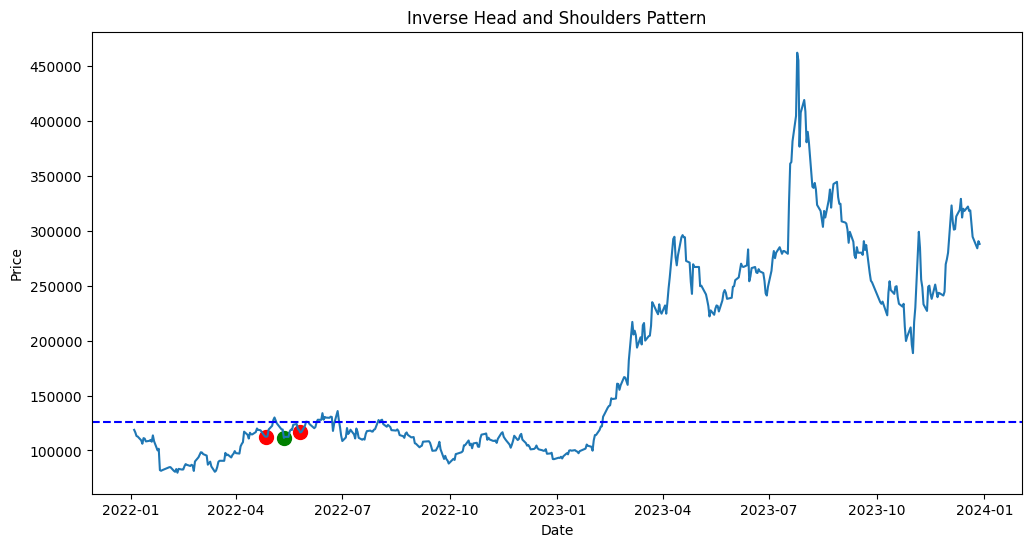

Inverse Head and Shoulders pattern detected:
Left Shoulder: 2022-09-16
Head: 2022-09-30
Right Shoulder: 2022-10-20
Suggested buy price (Neckline): 107900.00
Target price: 127700.00
---


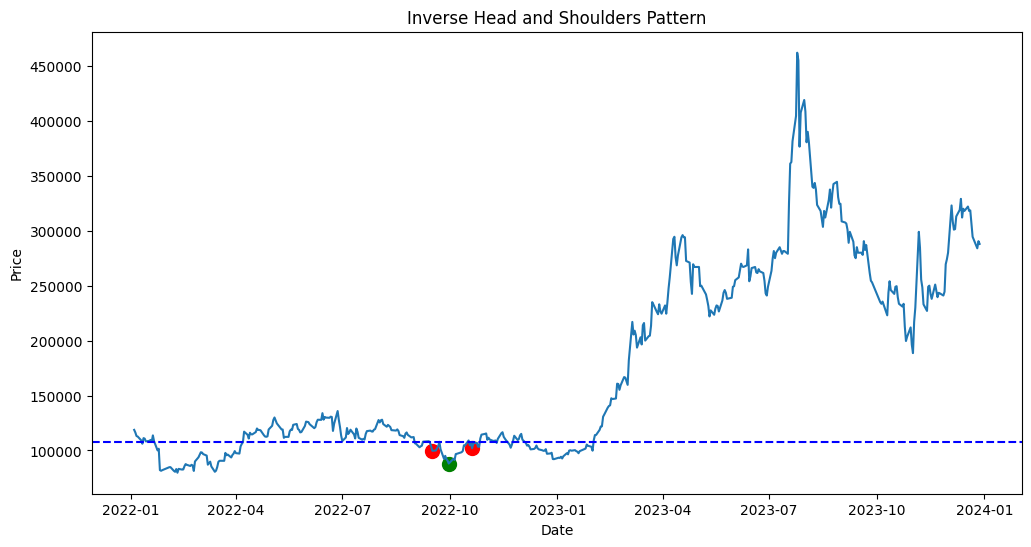

Inverse Head and Shoulders pattern detected:
Left Shoulder: 2023-10-10
Head: 2023-11-01
Right Shoulder: 2023-11-13
Suggested buy price (Neckline): 251000.00
Target price: 313400.00
---


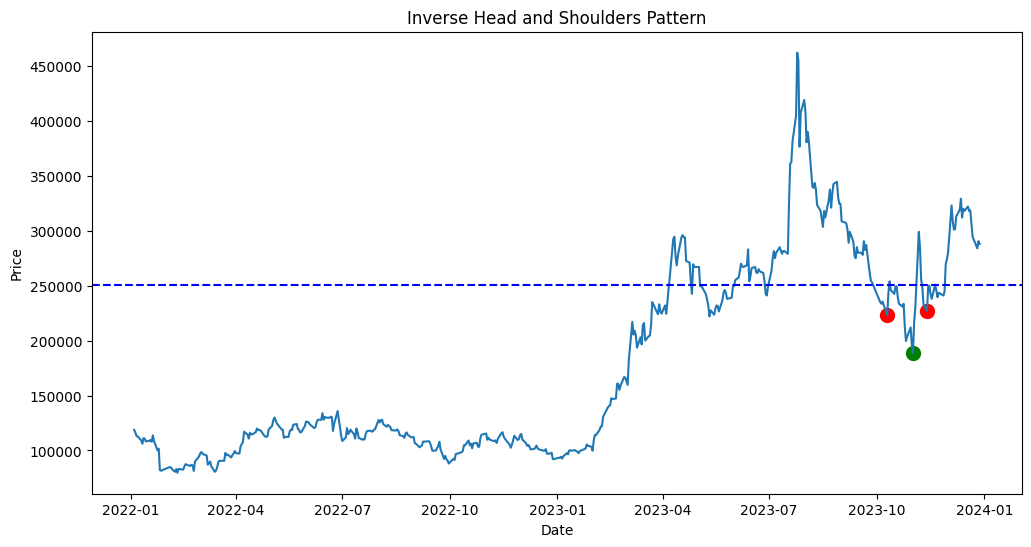

In [6]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import yfinance as yf
import matplotlib.pyplot as plt

def detect_inverse_head_and_shoulders(data, order=5):
    prices = data['Close'].values
    local_min = argrelextrema(prices, np.less, order=order)[0]
    local_max = argrelextrema(prices, np.greater, order=order)[0]
    extrema = np.sort(np.concatenate((local_min, local_max)))
    
    patterns = []
    for i in range(len(extrema) - 6):
        if (extrema[i] in local_min and
            extrema[i+1] in local_max and
            extrema[i+2] in local_min and
            extrema[i+3] in local_max and
            extrema[i+4] in local_min and
            extrema[i+5] in local_max):
            
            left_shoulder = prices[extrema[i]]
            head = prices[extrema[i+2]]
            right_shoulder = prices[extrema[i+4]]
            neckline = min(prices[extrema[i+1]], prices[extrema[i+5]])
            
            if head < left_shoulder and head < right_shoulder and abs(left_shoulder - right_shoulder) / left_shoulder < 0.1:
                patterns.append({
                    'left_shoulder': extrema[i],
                    'head': extrema[i+2],
                    'right_shoulder': extrema[i+4],
                    'neckline': neckline
                })
    
    return patterns

def calculate_buy_price(data, pattern):
    neckline = pattern['neckline']
    head = data['Close'].iloc[pattern['head']]
    target = neckline + (neckline - head)
    return neckline, target

def plot_pattern(data, pattern):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'])
    plt.scatter(data.index[pattern['left_shoulder']], data['Close'][pattern['left_shoulder']], color='red', s=100)
    plt.scatter(data.index[pattern['head']], data['Close'][pattern['head']], color='green', s=100)
    plt.scatter(data.index[pattern['right_shoulder']], data['Close'][pattern['right_shoulder']], color='red', s=100)
    plt.axhline(y=pattern['neckline'], color='blue', linestyle='--')
    plt.title('Inverse Head and Shoulders Pattern')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

def main():
    # Download stock data
    ticker = "247540.KQ"  # EcoPro BM stock symbol
    data = yf.download(ticker, start="2022-01-01", end="2023-12-31")
    
    # Detect patterns
    patterns = detect_inverse_head_and_shoulders(data)
    
    # Analyze patterns and suggest buy prices
    for pattern in patterns:
        buy_price, target_price = calculate_buy_price(data, pattern)
        print(f"Inverse Head and Shoulders pattern detected:")
        print(f"Left Shoulder: {data.index[pattern['left_shoulder']].date()}")
        print(f"Head: {data.index[pattern['head']].date()}")
        print(f"Right Shoulder: {data.index[pattern['right_shoulder']].date()}")
        print(f"Suggested buy price (Neckline): {buy_price:.2f}")
        print(f"Target price: {target_price:.2f}")
        print("---")
        
        # Plot the pattern
        plot_pattern(data, pattern)

if __name__ == "__main__":
    main()

[*********************100%%**********************]  1 of 1 completed
C:\Users\kwkim\AppData\Local\Temp\ipykernel_7368\1365644267.py:48: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(data.index[pattern['left_shoulder']], data['Close'][pattern['left_shoulder']], color='red', s=100, label='Left Shoulder')
C:\Users\kwkim\AppData\Local\Temp\ipykernel_7368\1365644267.py:49: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(data.index[pattern['head']], data['Close'][pattern['head']], color='green', s=100, label='Head')
C:\Users\kwkim\AppData\Local\Temp\ipykernel_7368\1365644267.py:50: FutureWarning: Seri

Inverse Head and Shoulders pattern detected:
Left Shoulder: 2023-04-13
Head: 2023-04-25
Right Shoulder: 2023-05-12
Suggested buy price (Neckline): 27.93
Target price: 29.62
---


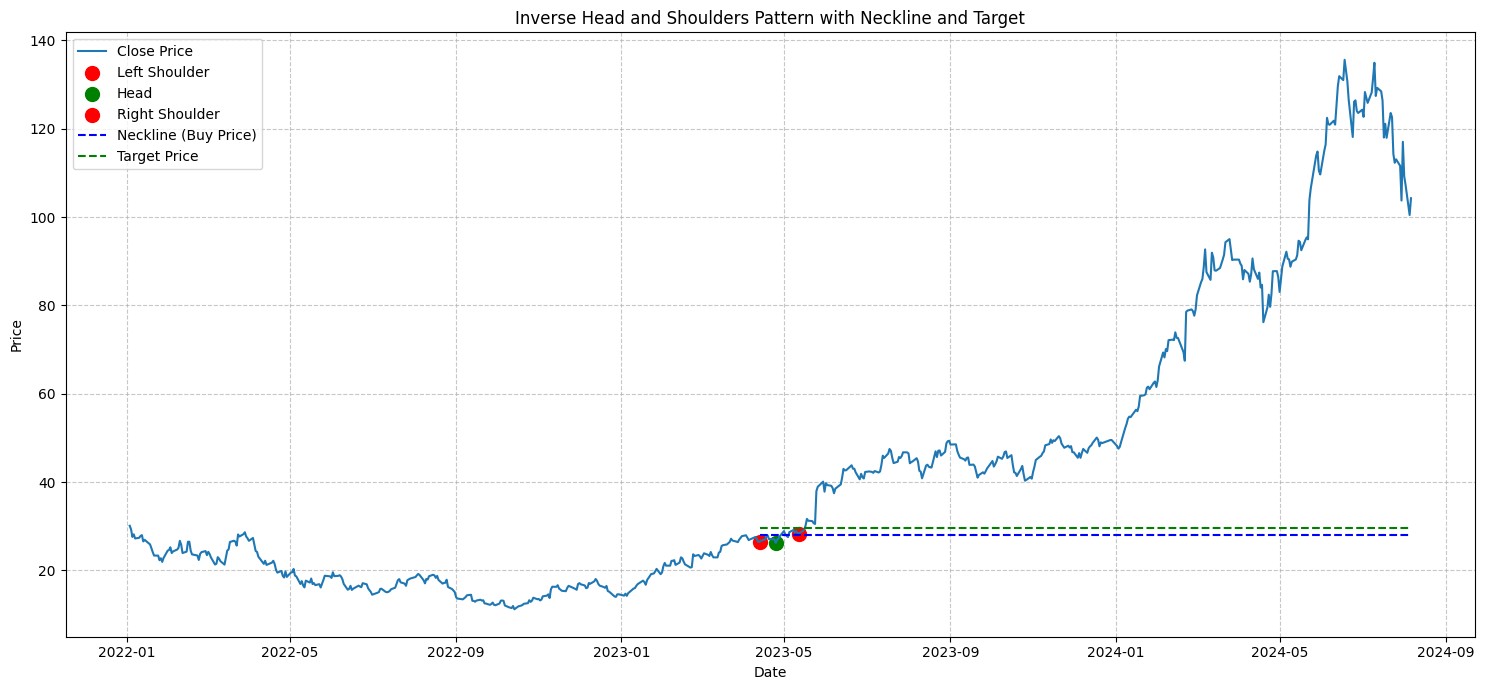

Inverse Head and Shoulders pattern detected:
Left Shoulder: 2023-07-21
Head: 2023-08-11
Right Shoulder: 2023-09-21
Suggested buy price (Neckline): 46.75
Target price: 52.65
---


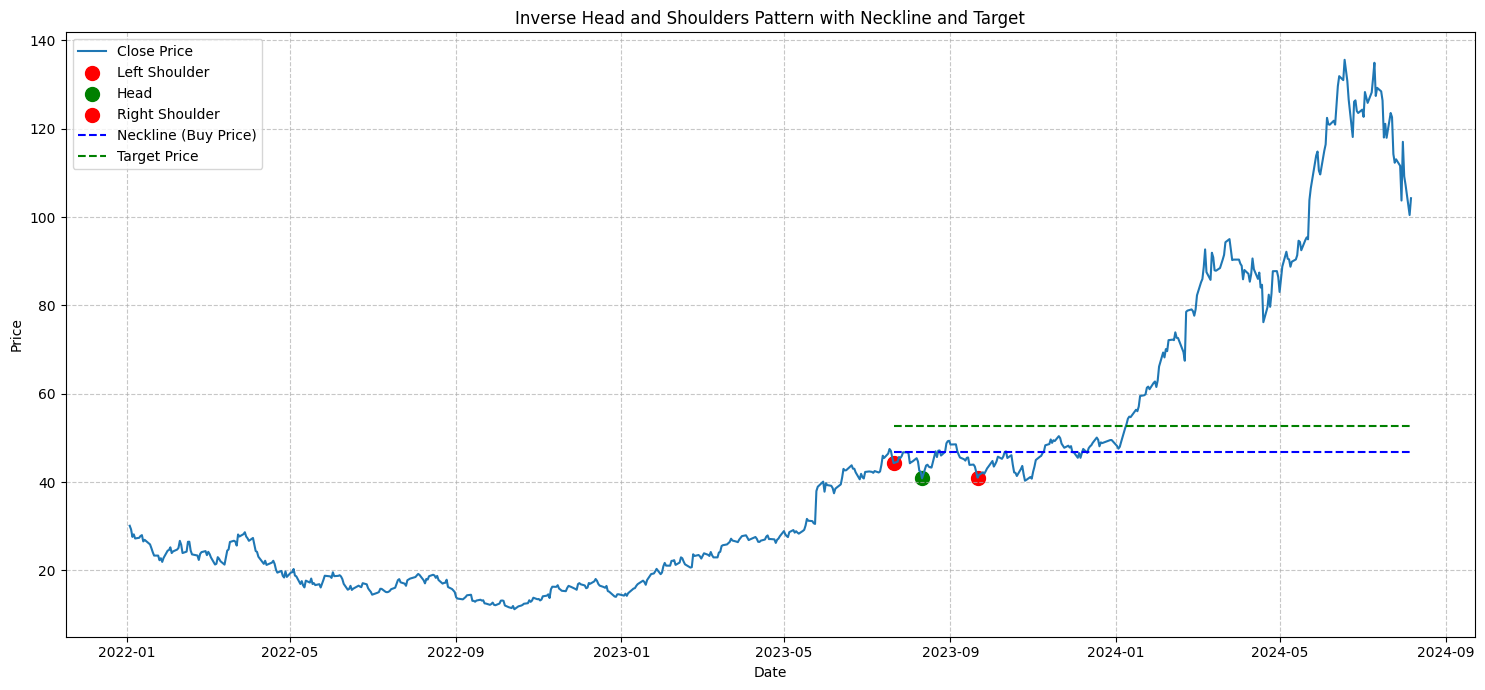

In [9]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import yfinance as yf
import matplotlib.pyplot as plt

def detect_inverse_head_and_shoulders(data, order=5):
    prices = data['Close'].values
    local_min = argrelextrema(prices, np.less, order=order)[0]
    local_max = argrelextrema(prices, np.greater, order=order)[0]
    extrema = np.sort(np.concatenate((local_min, local_max)))
    
    patterns = []
    for i in range(len(extrema) - 6):
        if (extrema[i] in local_min and
            extrema[i+1] in local_max and
            extrema[i+2] in local_min and
            extrema[i+3] in local_max and
            extrema[i+4] in local_min and
            extrema[i+5] in local_max):
            
            left_shoulder = prices[extrema[i]]
            head = prices[extrema[i+2]]
            right_shoulder = prices[extrema[i+4]]
            neckline = min(prices[extrema[i+1]], prices[extrema[i+5]])
            
            if head < left_shoulder and head < right_shoulder and abs(left_shoulder - right_shoulder) / left_shoulder < 0.1:
                patterns.append({
                    'left_shoulder': extrema[i],
                    'head': extrema[i+2],
                    'right_shoulder': extrema[i+4],
                    'neckline': neckline
                })
    
    return patterns

def calculate_buy_price(data, pattern):
    neckline = pattern['neckline']
    head = data['Close'].iloc[pattern['head']]
    target = neckline + (neckline - head)
    return neckline, target

def plot_pattern(data, pattern, buy_price, target_price):
    plt.figure(figsize=(15, 7))
    plt.plot(data.index, data['Close'], label='Close Price')
    
    # Plot pattern points
    plt.scatter(data.index[pattern['left_shoulder']], data['Close'][pattern['left_shoulder']], color='red', s=100, label='Left Shoulder')
    plt.scatter(data.index[pattern['head']], data['Close'][pattern['head']], color='green', s=100, label='Head')
    plt.scatter(data.index[pattern['right_shoulder']], data['Close'][pattern['right_shoulder']], color='red', s=100, label='Right Shoulder')
    
    # Plot neckline
    neckline_start = data.index[pattern['left_shoulder']]
    neckline_end = data.index[-1]  # Extend to the end of the data
    plt.hlines(y=buy_price, xmin=neckline_start, xmax=neckline_end, colors='blue', linestyles='--', label='Neckline (Buy Price)')
    
    # Plot target price
    plt.hlines(y=target_price, xmin=neckline_start, xmax=neckline_end, colors='green', linestyles='--', label='Target Price')
    
    plt.title('Inverse Head and Shoulders Pattern with Neckline and Target')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def main():
    # Download stock data
    ticker = "NVDA"  # EcoPro BM stock symbol
    data = yf.download(ticker, start="2022-01-01", end="2024-12-31")
    
    # Detect patterns
    patterns = detect_inverse_head_and_shoulders(data)
    
    # Analyze patterns and suggest buy prices
    for pattern in patterns:
        buy_price, target_price = calculate_buy_price(data, pattern)
        print(f"Inverse Head and Shoulders pattern detected:")
        print(f"Left Shoulder: {data.index[pattern['left_shoulder']].date()}")
        print(f"Head: {data.index[pattern['head']].date()}")
        print(f"Right Shoulder: {data.index[pattern['right_shoulder']].date()}")
        print(f"Suggested buy price (Neckline): {buy_price:.2f}")
        print(f"Target price: {target_price:.2f}")
        print("---")
        
        # Plot the pattern with neckline and target price
        plot_pattern(data, pattern, buy_price, target_price)

if __name__ == "__main__":
    main()